# Word Frequency in Star Wars Movies

The purpose of this project is to find out what are the most frequent words in Star Wars movies and how often they occur. 

In [33]:
import pandas as pd
import re

from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [34]:
df = pd.read_csv('star_wars_transcripts.csv') #loading previously web scraped data 

In [35]:
df

,title,transcript
0,A New Hope,STAR WARSEpisode IVA NEW HOPEFrom theJOURNAL O...
1,The Empire Strikes Back,THE EMPIRE STRIKES BACK\nWritten by\nLawrence ...
2,Return of the Jedi,\nSTAR WARS: EPISODE VI\nRETURN OF THE JEDI\n\...
3,The Phantom Menace,STAR WARS : EPISODE 1:THE PHANTOM MENACE\nTITL...
4,Attack of the Clones,"A long time ago, in a galaxy far, far away......."
5,Revenge of the Sith,"[1 EXT. SPACE A long time ago in a galaxy far,..."
6,The Last Jedi,STAR WARS: THE LAST JEDIWritten and directed b...
7,The Rise of Skywalker,STAR WARS: THE RISE OF SKYWALKERScreenplay byC...
8,The Force Awakens,STAR WA...


In [36]:
df['transcript'][3][:1000]

'STAR WARS\xa0: EPISODE 1:THE PHANTOM MENACE\nTITLE CARD\xa0: A long time ago in a galaxy far, far away....\n[A vast sea of stars serves as the backdrop for the main title, followed by a roll up, which crawls up into infinity.]\nEPISODE 1 THE PHANTOM MENACE\xa0Turmoil has engulfed the Galactic Republic. The taxation of trade routes to outlaying star systems is in dispute. Hoping to resolve the matter with a blockade of deadly battleships, the greedy Trade Federation has stopped all shipping to the small planet of Naboo. While the congress of the Republic endlessly debates this alarming chain of events, the Supreme Chancellor has secretly dispatched two Jedi Knights, the guardians of peace and justice in the galaxy, to settle the conflict.....\n[PAN DOWN to reveal a small space cruiser heading TOWARD CAMERA at great speed. PAN with the cruiser as it heads toward the beautiful green planet of Naboo, which is surrounded by hundreds of Trade Federation battleships.\xa0In the cockpit of the

In [37]:
def clean_text(text):
    '''Remove roles from the transcripts,\xa0 and \n characters and remove text between brackets,
       make text lowercase, remove punctuation, remove single characters. '''
    text = text.replace('\n','')
    text = text.replace('\xa0','')
    text = re.sub(r'[\(\[].*?[\)\]]','',text
    text = (re.sub('[\W]+', ' ',text)) #removing punctuation
    text = re.sub(r'\b[A-Z]+\b','', text) #removing characters with capital letters only 
    text = text.lower()
    text = text.replace('3po','threepio')
    return text

In [38]:
df['transcript']=df['transcript'].apply(lambda x: clean_text(x))

In [39]:
wt = WhitespaceTokenizer()

In [40]:
lemmatizer = WordNetLemmatizer() 

In [41]:
def lemmatize(text):
    ''' tokenization and lemmatization of text'''
    return [lemmatizer.lemmatize(w) for w in wt.tokenize(text)]

In [42]:
df['tokenized'] = df['transcript'].apply(lambda x: lemmatize(x))

In [43]:
import inflect
inflect= inflect.engine()

In [44]:
def num_to_word(text): 
    ''' Convering numbers to words'''
    words = []
    for word in text:
        if word.isdigit():
            words.append(inflect.number_to_words(word))
        else:
            words.append(word)
    return words

In [45]:
df['tokenized']=df['tokenized'].apply(lambda x: num_to_word(x))

In [46]:
stopwords = set(stopwords.words('english'))

In [51]:
df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [88]:
def top_words(text): 
    ''' Getting most frequent words'''
    freq_dist = FreqDist(text)
    most_common = pd.DataFrame(freq_dist.most_common(10),columns=['words','count'])
    return most_common

In [83]:
new_hope = top_words(df['tokenized'][0])
empire_strikes_back = top_words(df['tokenized'][1])
return_jedi = top_words(df['tokenized'][2])
phantom_menace = top_words(df['tokenized'][3])
attack_clones = top_words(df['tokenized'][4])
revenge_sith = top_words(df['tokenized'][5])
last_jedi = top_words(df['tokenized'][6])
rise_skywalker = top_words(df['tokenized'][7])
force_awakens = top_words(df['tokenized'][8])

In [84]:
fig = make_subplots(rows=3, cols=3, subplot_titles=('A New Hope', 'The Empire Strakes Back', 'Return of the Jedi', 'The Phantom Menace','Attack of the Clones', 'Revenge of the Sith', 'The Force Awakens', 'The Last Jedi','The Rise of Skywalker'))

fig.add_trace(go.Scatter(x=new_hope['words'], y=new_hope['count']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=empire_strikes_back['words'], y=empire_strikes_back['count']),
              row=1, col=2)

fig.add_trace(go.Scatter(x=return_jedi['words'], y=return_jedi['count']),
              row=1, col=3)

fig.add_trace(go.Scatter(x=phantom_menace['words'], y=phantom_menace['count']),
              row=2, col=1)

fig.add_trace(go.Scatter(x=attack_clones['words'], y=attack_clones['count']),
              row=2, col=2)

fig.add_trace(go.Scatter(x=revenge_sith['words'], y=revenge_sith['count']),
              row=2, col=3)

fig.add_trace(go.Scatter(x=force_awakens['words'], y=force_awakens['count']),
              row=3, col=1)

fig.add_trace(go.Scatter(x=last_jedi['words'], y=last_jedi['count']),
              row=3, col=2)

fig.add_trace(go.Scatter(x=rise_skywalker['words'], y=rise_skywalker['count']),
              row=3, col=3)

fig.update_layout(template="simple_white")
fig.update_layout(showlegend=False)
fig.update_layout(height=750, width=900)
fig.update_layout(title={'text': 'Top 10 Words in Star Wars Movies','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [89]:
print(f"The most common word in 'A New Hope' is {most_common_0['words'][0]} and it occurrs {most_common_0['count'][0]} times")
print(f"The most common word in 'The Empire Strikes Back' is {most_common_1['words'][0]} and it occurrs {most_common_1['count'][0]} times")
print(f"The most common word in 'Return of the Jedi' is {most_common_2['words'][0]} and it occurrs {most_common_2['count'][0]} times")
print(f"The most common word in 'The Phantom Menace' is {most_common_3['words'][0]} and it occurrs {most_common_3['count'][0]} times")
print(f"The most common word in 'Attack of the Clones' is {most_common_4['words'][0]} and it occurrs {most_common_4['count'][0]} times")
print(f"The most common word in 'Revenge of the Sith' is {most_common_5['words'][0]} and it occurrs {most_common_5['count'][0]} times")
print(f"The most common word in 'The Force Awakens' is {most_common_8['words'][0]} and it occurrs {most_common_8['count'][0]} times")
print(f"The most common word in 'The Last Jedi' is {most_common_6['words'][0]} and it occurrs {most_common_6['count'][0]} times")
print(f"The most common word in 'The Rise of Skywalker' is {most_common_7['words'][0]} and it occurrs {most_common_7['count'][0]} times")

The most common word in 'A New Hope' is luke and it occurrs 409 times
The most common word in 'The Empire Strikes Back' is luke and it occurrs 227 times
The most common word in 'Return of the Jedi' is luke and it occurrs 243 times
The most common word in 'The Phantom Menace' is one and it occurrs 53 times
The most common word in 'Attack of the Clones' is padmé and it occurrs 124 times
The most common word in 'Revenge of the Sith' is jedi and it occurrs 174 times
The most common word in 'The Force Awakens' is rey and it occurrs 245 times
The most common word in 'The Last Jedi' is get and it occurrs 49 times
The most common word in 'The Rise of Skywalker' is threepio and it occurrs 80 times


In [27]:
transcripts = df['tokenized'][0] + df['tokenized'][1] + df['tokenized'][2] + df['tokenized'][3] + df['tokenized'][4] + df['tokenized'][5] + df['tokenized'][6] + df['tokenized'][7] + df['tokenized'][8]

In [28]:
transcript = ' '.join(transcripts)

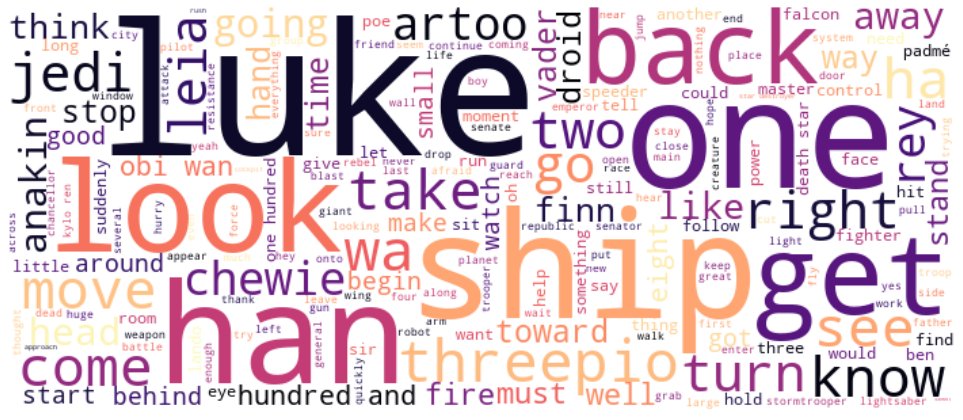

In [29]:
cloud = WordCloud(width = 700, height = 300, background_color = 'white',stopwords=stopwords, colormap = plt.cm.magma_r).generate(transcript)
plt.figure(figsize=[17, 15])
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
freq_dist = FreqDist(transcripts)
most_common = pd.DataFrame(freq_dist.most_common(10),columns=['words','count'])

In [31]:
fig =  px.bar(most_common, x='words', y='count',text='count')
fig.update_traces(textposition='outside')
#fig.update_layout(template="plotly_dark")
fig.update_layout(template="simple_white")
fig.update_layout(showlegend=False)
fig.update_layout(height=450, width=900)
fig.update_xaxes(title_font=dict(size=10, family='Courier'))
fig.update_yaxes(title_font=dict(size=10, family='Courier'))
fig.update_layout(xaxis = dict(tickangle = 90))
fig.update_traces(marker_color='#ff8c66')
fig.update_layout(title={'text': '10 Most Frequent Words in Star Wars Movies','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [32]:
f"The most common word in Star Wars movies is {most_common['words'][0]} and it occurs {most_common['count'][0]} times." 

'The most common word in Star Wars movies is luke and it occurs 929 times.'